In [1]:
# usual imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

from sklearn.cross_validation import train_test_split

# Each is a different implemntation of a text transform tool: Bag of Words & Tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/amazon_cells_labelled.txt"
Amazon_data = pd.read_csv(url , sep = "\t", names = ['text','sentiment'])

In [3]:
Amazon_data.head(20)

,text,sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0
2,"Good case, Excellent value.",1
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN
5,Great for the jawbone.,1
6,When I got this item it was larger than I thou...,NaN
7,(I looked for one that specifically said DCU-6...,NaN
8,The first time it was turned on the screen dis...,NaN
9,In some programs clicking it is the same as hi...,NaN


#### Here is an alternative way to read this txt file.

In [4]:
"""
rows = []
with open('/Users/hamed/Desktop/SF-DAT-20/SF-DAT-20/Data/amazon_cells_labelled.txt') as f:
    for i,line in enumerate(f.readlines()):
        row = (line.split('\n')[0]).split('\t')
        if row[1] == '':
            row[1] = np.nan
        else:
            row[1] = int(row[1])
        rows.append(row)
        
Amazon_data = pd.DataFrame(rows,columns=['text','sentiment'])
Amazon_data.head()
"""

"\nrows = []\nwith open('/Users/hamed/Desktop/SF-DAT-20/SF-DAT-20/Data/amazon_cells_labelled.txt') as f:\n    for i,line in enumerate(f.readlines()):\n        row = (line.split('\n')[0]).split('\t')\n        if row[1] == '':\n            row[1] = np.nan\n        else:\n            row[1] = int(row[1])\n        rows.append(row)\n        \nAmazon_data = pd.DataFrame(rows,columns=['text','sentiment'])\nAmazon_data.head()\n"

In [5]:
Amazon_data.dropna(inplace = True)
Amazon_data.head()

,text,sentiment
1,So there is no way for me to plug it in here i...,0
2,"Good case, Excellent value.",1
5,Great for the jawbone.,1
10,Tied to charger for conversations lasting more...,0
11,The mic is great.,1


In [6]:
len(Amazon_data)

1000

The data is for Amazon reviews. In order to use it we need to create a feature space. Please review the documentation for these functions: 

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
You'll see that we have a ton of options available. We'll start out with the simplest default.

In [7]:
count_vect = CountVectorizer(stop_words = 'english')
bag_o_words = count_vect.fit_transform(Amazon_data['text'])
bag_o_words.shape

(1000, 1642)

Dense matrices store every entry in the matrix. Sparse matrices only store the nonzero entries. Sparse matrices don't have a lot of extra features, and they may not work with some of the alogrithms. You use them when you need to work with matrices that are too big, and have significant zero values. You can convert none-dense matrices to dense matrices using .todense( )

In [8]:
# bag_o_words.todense()
count_vect.get_feature_names()

[u'10',
 u'100',
 u'11',
 u'12',
 u'13',
 u'15',
 u'15g',
 u'18',
 u'20',
 u'2000',
 u'2005',
 u'2160',
 u'24',
 u'2mp',
 u'325',
 u'350',
 u'375',
 u'3o',
 u'42',
 u'44',
 u'45',
 u'4s',
 u'50',
 u'5020',
 u'510',
 u'5320',
 u'680',
 u'700w',
 u'8125',
 u'8525',
 u'8530',
 u'abhor',
 u'ability',
 u'able',
 u'abound',
 u'absolutel',
 u'absolutely',
 u'ac',
 u'accept',
 u'acceptable',
 u'access',
 u'accessable',
 u'accessing',
 u'accessory',
 u'accessoryone',
 u'accidentally',
 u'accompanied',
 u'according',
 u'activate',
 u'activated',
 u'activesync',
 u'actually',
 u'ad',
 u'adapter',
 u'adapters',
 u'add',
 u'addition',
 u'additional',
 u'address',
 u'adhesive',
 u'adorable',
 u'advertised',
 u'advise',
 u'aggravating',
 u'ago',
 u'alarm',
 u'allot',
 u'allow',
 u'allowing',
 u'allows',
 u'alot',
 u'aluminum',
 u'amazed',
 u'amazing',
 u'amazon',
 u'amp',
 u'ample',
 u'angeles',
 u'angle',
 u'answer',
 u'ant',
 u'antena',
 u'anti',
 u'apart',
 u'apartment',
 u'apparently',
 u'appeali

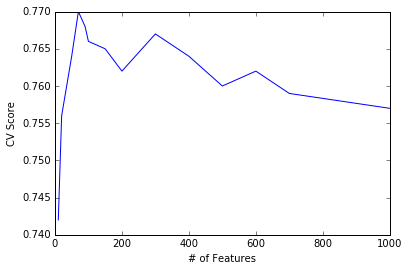

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
X = bag_o_words
y = Amazon_data['sentiment']
Features = [10, 20, 50, 70, 80, 90, 100, 150, 200, 300, 400, 500, 600, 700, 1000]
Scores_cv = []
for i in Features:
    RF = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True,
                           n_jobs = -1)

    RF.fit(X, y)
    Scores_cv.append(cross_val_score(RF, X, y, cv=10, scoring = 'accuracy', n_jobs = -1).mean())

plt.plot(Features, Scores_cv)
plt.xlabel("# of Features")
plt.ylabel("CV Score")
plt.show()

# GridSearchCV and Pipeline Great tools that all data scientists enjoy using!

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV


In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
# Resetting our data
X_train, X_test, y_train, y_test = train_test_split(Amazon_data['text'], Amazon_data['sentiment'], test_size=0.2)

In [12]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', RandomForestClassifier())])


You can set both parameters of your classification algorithm and parameters of CountVectorizer(). Couple of points to remember:

1. You cannot use parameters that contradict each other. For example, if min exceeds max, you will see an error.
2. It is sometimes hard to find about contradictions of two different parameters. For example if you set maximum_feature in random forest to 50 but max_df in vect to 30, then you will have an error.
3. It seems like for classification problems, you can only use algorithms that work with probability. If your algorithm works with Loss functions then you cannot use GridSearchCV. Particularly, it seems like Gradiant Boosting Trees cannot be used in GridSearchCV. A few algorithms that can be used in GridSearchCV are: Logistic Regression,  Random Forest and Naive Bayes. 

In [13]:
parameters = {'vect__min_df' : [1,2,3],
              'vect__max_df' : [5,10,100,200,500,1000],
              'clf__n_estimators' : [1000]}

gs_clf = GridSearchCV(text_clf, parameters, cv = 10, n_jobs = -1)


In [14]:
fit_grid = gs_clf.fit(X_train, y_train)


In [15]:
fit_grid.score(X_test, y_test)

0.77500000000000002

In [16]:
fit_grid.best_params_


{'clf__n_estimators': 1000, 'vect__max_df': 100, 'vect__min_df': 1}

#### Now let's try TfidVectorizer

In [17]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()) ])
parameters = {'vect__min_df':[1,5,10],
              'vect__max_df':[15,50,100,200,500,1000],
              'clf__n_estimators':[1000]}

gs_clf = GridSearchCV(text_clf, parameters, cv = 10, n_jobs = -1)


In [18]:
fit_grid = gs_clf.fit(X_train, y_train)


In [19]:
fit_grid.score(X_test, y_test)

0.755

In [20]:
fit_grid.best_params_



{'clf__n_estimators': 1000, 'vect__max_df': 100, 'vect__min_df': 1}